In [1]:
#first, import everything but the kitchen sink
import numpy as np
import matplotlib
matplotlib.rcParams['text.usetex'] = True # Comment this line if no LaTeX installation is available
matplotlib.rcParams['font.family'] = 'serif' # Comment this line if no LaTeX installation is available
matplotlib.rcParams['text.latex.preamble']=[r'\usepackage{amsmath}']
import matplotlib.pyplot as plt
import sys
import os
import torch; torch.set_default_dtype(torch.float64)

module_path = os.path.abspath(os.path.join('..'))
sys.path.insert(1, 'C:\\Users\\vascodebruijn\\Documents\\GitHub\\graph-neural-networks')

if module_path not in sys.path:
    sys.path.append(module_path+"\\Python")
import utils

#Some variables
K= np.array([1,2,3,4,5])
L =np.array( [1,2,3,4])
F = np.array([1,2,4,8,16,32,64,128])

Faxis = (1,2)
Laxis = (0,2)
Kaxis = (0,1)
    
#make plotting a bit more easier
def plot_traces(data, title,labels =[],description=''):
    if len(data) > 1:
        data = np.transpose(data)
    fig = plt.figure()
    plt.plot(data)   
    fig.suptitle(title)
    plt.ylabel(r'Guessing Entropy')
    plt.xlabel(r'Number of Traces')
    plt.legend(labels)
    plt.figtext(.01, .01,description)
    

def plot_means(data,ax,values,param,title):
    fig = plt.figure()
    plt.plot(np.transpose(np.nanmean(data,axis=ax)))    
    fig.suptitle(title)
    plt.ylabel(r'Guessing Entropy')
    plt.xlabel(r'Number of Traces')
    
    labels = []
    for val in values:
        label = param +"="+str(val)
        labels.append(label)
    plt.legend(labels)
    
#showtime
data = utils.get_all_results()


C:\Users\vascodebruijn\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: Mean of empty slice
  


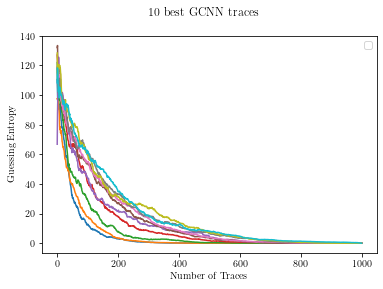

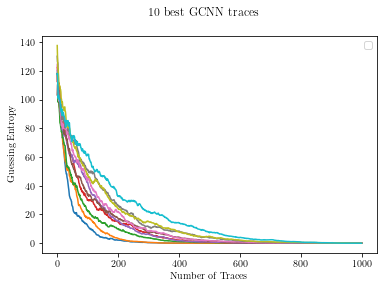

In [6]:
###Inital Hyperparam Tuning

###GCNN
gcnn= data['experiments\\hyper_param_tuning_gcnn']
gcnn_data_flt = gcnn['res']
gcnn_data = utils.reshape_results(gcnn_data_flt,len(F),len(L),len(K),efn=1)
gcnn_mean = np.nanmean(gcnn_data_flt, axis=1)
gcnn_data_mean = np.nanmean(gcnn_data,axis=3)
gcnn_best_ids = np.argsort(gcnn_mean)[0:10]
gcnn_ids_unraveled = np.unravel_index(gcnn_best_ids, (len(F),len(L),len(K)))
plot_traces(gcnn_data_flt[gcnn_best_ids], '10 best GCNN traces')
gcnn_best_hp_list = np.array(gcnn['hyperparam'])[gcnn_best_ids.astype(int)].tolist()
utils.save_hyperparamlist(gcnn_best_hp_list, 'CE_hypertuning_GCNN')

###2nd Run
gcnn_2= data['experiments\\hyper_param_tuning_gcnn_2']
gcnn_2_data_flt = gcnn_2['res']
gcnn_2_data = utils.reshape_results(gcnn_2_data_flt,len(F),len(L),len(K),efn=1)
gcnn_2_mean = np.nanmean(gcnn_2_data_flt, axis=1)
gcnn_2_data_mean = np.nanmean(gcnn_2_data,axis=3)
gcnn_2_best_ids = np.argsort(gcnn_2_mean)[0:10]
gcnn_2_ids_unraveled = np.unravel_index(gcnn_2_best_ids, (len(F),len(L),len(K)))
plot_traces(gcnn_2_data_flt[gcnn_2_best_ids], '10 best GCNN traces')
gcnn_2_best_hp_list = np.array(gcnn_2['hyperparam'])[gcnn_2_best_ids.astype(int)].tolist()
utils.save_hyperparamlist(gcnn_2_best_hp_list, 'CE_hypertuning_GCNN')

F_gcnn = F[gcnn_ids_unraveled[0]]
L_gcnn =L[gcnn_ids_unraveled[1]]
K_gcnn = K[gcnn_ids_unraveled[2]]


In [ ]:
###GCAT
gcat= data['experiments\\hyper_param_tuning_gcat']
gcat_2 = data['experiments\\hyper_param_tuning_gcat_2']
gcat_data_flt = gcat['res']
gcat_data_flt= np.append(gcat_data_flt, gcat_2['res'], axis=0)
gcat_data = utils.reshape_results(gcat_data_flt,len(F),len(L),len(K),efn=1)
gcat_mean = np.nanmean(gcat_data_flt, axis=1)
gcat_data_mean = np.nanmean(gcat_data,axis=3)
gcat_best_ids = np.argsort(gcat_mean)[0:10]
gcat_ids_unraveled = np.unravel_index(gcat_best_ids, (len(F),len(L),len(K)))
plot_traces(gcat_data_flt[gcat_best_ids], '10 best GCAT traces')
gcat_best_hp_list = np.array(gcat['hyperparam'])[gcat_best_ids.astype(int)].tolist()
utils.save_hyperparamlist(gcat_best_hp_list, 'CE_hypertuning_GCAT')

In [ ]:
###EdgeNet
edgenet = data['experiments\\hyper_param_tuning_edgenet']
edgenet_data_flt = edgenet['res']
edgenet_data = utils.reshape_results(edgenet_data_flt,len(F),len(L),len(K),efn=1)
edgenet_mean = np.nanmean(edgenet_data_flt, axis=1)
edgenet_data_mean = np.nanmean(edgenet_data,axis=3)
edgenet_best_ids = np.argsort(edgenet_mean)[0:10]
edgenet_ids_unraveled = np.unravel_index(edgenet_best_ids, (len(F),len(L),len(K)))
plot_traces(edgenet_data_flt[edgenet_best_ids], '10 best EdgeNet traces')
edgenet_best_hp_list = np.array(edgenet['hyperparam'])[edgenet_best_ids.astype(int)].tolist()
utils.save_hyperparamlist(edgenet_best_hp_list, 'CE_hypertuning_EdgeNet')

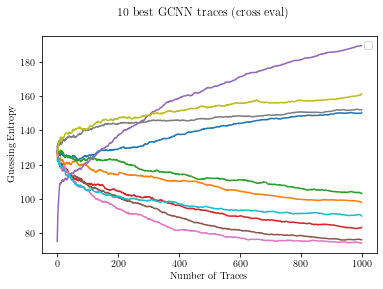

In [4]:
###Cross Eval Hyperparam Tuning
### GCNN
gcnn_CE = data['experiments\\CE_hypertuning_GCNN']
gcnn_CE_data = gcnn_CE['res']
gcnn_CE_hyperparam = gcnn_CE['hyperparam']
gcnn_CE_srt = np.reshape(gcnn_CE_data,(10,10,1000))
gcnn_CE_mean = np.mean(gcnn_CE_srt, axis = 1 )
plot_traces(gcnn_CE_mean, '10 best GCNN traces (cross eval)')

In [ ]:
### EdgeNet
edgenet_CE = data['experiments\\CE_hypertuning_EdgeNet']
edgenet_CE_data = edgenet_CE['res']
edgenet_CE_hyperparam = edgenet_CE['hyperparam']
edgenet_CE_data = edgenet_CE_data[0:30,:]
edgenet_CE_srt = np.reshape(edgenet_CE_data,(3,10,1000))
edgenet_CE_mean = np.mean(edgenet_CE_srt, axis = 1 )
plot_traces(edgenet_CE_mean, '10 best EdgeNet traces (cross eval)')


In [ ]:
###GCAT
gcat_CE = data['experiments\\CE_hypertuning_GCAT']
gcat_CE_data = gcat_CE['res']
gcat_CE_hyperparam = gcat_CE['hyperparam']
gcat_CE_data = gcat_CE_data[0:70,:]
gcat_CE_srt = np.reshape(gcat_CE_data,(7,10,1000))
gcat_CE_mean = np.mean(gcat_CE_srt, axis = 1 )
plot_traces(gcat_CE_mean, '10 best gcat traces (cross eval)')

In [ ]:
###Performance check for best 
###GCNN
perf_gcnn = data['experiments\\performance_test_GCNN']
perf_gcnn_data = perf_gcnn['res']
plot_traces(perf_gcnn_data,'Multiple CE runs GCNN ')
plot_traces(np.mean(perf_gcnn_data,axis=0),'Multiple CE runs GCNN (MEAN)')

perf_gcnn_2 = data['experiments\\performance_test_GCNN_2']
perf_gcnn_2_data = perf_gcnn_2['res']
plot_traces(perf_gcnn_2_data,'Multiple CE runs')
plot_traces(np.mean(perf_gcnn_2_data,axis=0),'Multiple CE runs GCNN (MEAN)')

In [ ]:
###GCAT
perf_gcat = data['experiments\\performance_test_GCAT']
perf_gcat_data = perf_gcat['res']
plot_traces(perf_gcat_data,'Multiple CE runs GCAT')
plot_traces(np.mean(perf_gcat_data,axis=0),'Multiple CE runs GCAT (MEAN)')

In [ ]:

###EdgeNet
perf_edgenet = data['experiments\\performance_test_EdgeNet']
perf_edgenet_data = perf_edgenet['res']
plot_traces(perf_edgenet_data,'Multiple CE runs edgenet ')
plot_traces(np.mean(perf_edgenet_data,axis=0),'Multiple CE runs edgenet (MEAN)')

In [ ]:
###Fixeded Hyperparam Tuning
perf_gcnn_L = data['experiments\\performance_test_GCNN_L']
perf_gcnn_L_data = perf_gcnn_L['res']
perf_gcnn_L_srt = np.reshape(perf_gcnn_L_data,(5,10,1000))
perf_gcnn_L_mean = np.mean(perf_gcnn_L_srt, axis=1)
plot_traces(perf_gcnn_L_mean,'Hyper Paramtuning nLayers',labels=[1,2,3,4,5])

perf_gcnn_K = data['experiments\\performance_test_GCNN_K']
perf_gcnn_K_data = perf_gcnn_K['res']
perf_gcnn_K_srt = np.reshape(perf_gcnn_K_data,(5,10,1000))
perf_gcnn_K_mean = np.mean(perf_gcnn_K_srt, axis=1)
plot_traces(perf_gcnn_K_mean,'Hyper Paramtuning nHops',labels=[1,2,3,4,5])

perf_gcnn_N = data['experiments\\performance_test_GCNN_N']
perf_gcnn_N_data = perf_gcnn_N['res']
perf_gcnn_N_srt = np.reshape(perf_gcnn_N_data,(6,10,1000))
perf_gcnn_N_mean = np.mean(perf_gcnn_N_srt, axis=1)
plot_traces(perf_gcnn_N_mean,'Hyper Paramtuning nNeighbours',labels=[1,2,5,8,10,16])

perf_gcnn_F = data['experiments\\performance_test_GCNN_F']
perf_gcnn_F_data = perf_gcnn_F['res']
perf_gcnn_F_data = np.pad(perf_gcnn_F_data,[(0,6),(0,0)],mode='constant',constant_values=np.nan)
perf_gcnn_F_srt = np.reshape(perf_gcnn_F_data,(8,10,1000))
perf_gcnn_F_mean = np.nanmean(perf_gcnn_F_srt, axis=1)
plot_traces(perf_gcnn_F_mean,'Hyper Paramtuning nFeatures',labels=[1,2,4,8,16,32,64,128])


In [ ]:
plot_means(gcnn_data,Faxis,F,'nFeatures', 'GCNN Hypertuning nFeatures')
plot_means(gcnn_data,Laxis,L,'nLayers', 'GCNN Hypertuning nLayers')
plot_means(gcnn_data,Kaxis,K,'nHops', 'GCNN Hypertuning nHops')

plot_means(gcat_data,Faxis,F,'nFeatures', 'GCAT Hypertuning nFeatures')
plot_means(gcat_data,Laxis,L,'nLayers', 'GCAT Hypertuning nLayers')
plot_means(gcat_data,Kaxis,K,'nHops', 'GCAT Hypertuning nHops')

plot_means(edgenet_data,Faxis,F,'nFeatures', 'EdgeNet Hypertuning nFeatures')
plot_means(edgenet_data,Laxis,L,'nLayers', 'EdgeNet Hypertuning nLayers')
plot_means(edgenet_data,Kaxis,K,'nHops', 'EdgeNet Hypertuning nHops')
(gcnn_data,Faxis,F,'nFeatures', 'GCNN Hypertuning nFeatures')
plot_means(gcnn_data,Laxis,L,'nLayers', 'GCNN Hypertuning nLayers')
plot_means(gcnn_data,Kaxis,K,'nHops', 'GCNN Hypertuning nHops')

plot_means(gcat_data,Faxis,F,'nFeatures', 'GCAT Hypertuning nFeatures')
plot_means(gcat_data,Laxis,L,'nLayers', 'GCAT Hypertuning nLayers')
plot_means(gcat_data,Kaxis,K,'nHops', 'GCAT Hypertuning nHops')

plot_means(edgenet_data,Faxis,F,'nFeatures', 'EdgeNet Hypertuning nFeatures')
plot_means(edgenet_data,Laxis,L,'nLayers', 'EdgeNet Hypertuning nLayers')
plot_means(edgenet_data,Kaxis,K,'nHops', 'EdgeNet Hypertuning nHops')


C:\Users\vascodebruijn\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice
  import sys


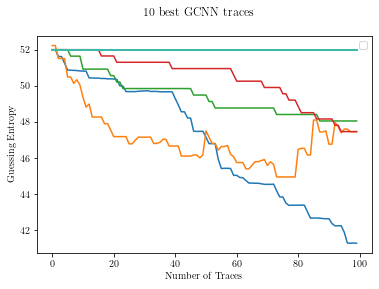

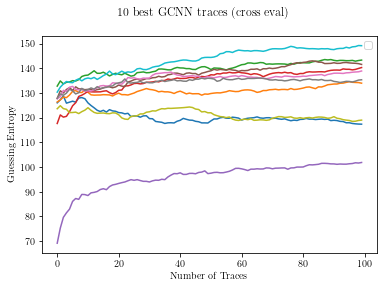

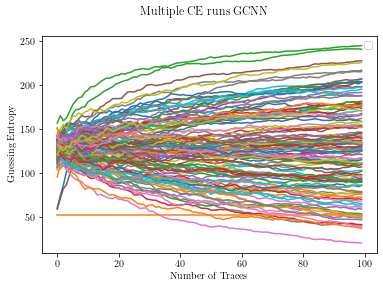

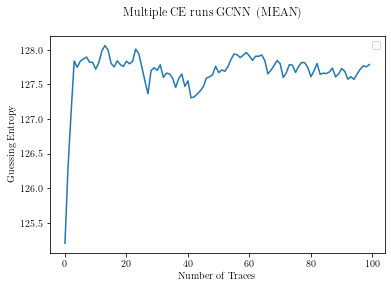

In [8]:
#Using General Guessing Entropy
###GCNN
gcnn= data['experiments\\hyper_param_tuning_gcnn_GE_gen']
gcnn_data_flt = gcnn['res']
gcnn_data = utils.reshape_results(gcnn_data_flt,len(F),len(L),len(K),efn=1)
gcnn_mean = np.nanmean(gcnn_data_flt, axis=1)
gcnn_data_mean = np.nanmean(gcnn_data,axis=3)
gcnn_best_ids = np.argsort(gcnn_mean)[0:10]
gcnn_ids_unraveled = np.unravel_index(gcnn_best_ids, (len(F),len(L),len(K)))
plot_traces(gcnn_data_flt[gcnn_best_ids], '10 best GCNN traces')
gcnn_best_hp_list = np.array(gcnn['hyperparam'])[gcnn_best_ids.astype(int)].tolist()
#utils.save_hyperparamlist(gcnn_best_hp_list, 'CE_hypertuning_GCNN')

gcnn_CE = data['experiments\\CE_hypertuning_GCNN_GE_gen']
gcnn_CE_data = gcnn_CE['res']
gcnn_CE_hyperparam = gcnn_CE['hyperparam']
gcnn_CE_srt = np.reshape(gcnn_CE_data,(10,10,100))
gcnn_CE_mean = np.mean(gcnn_CE_srt, axis = 1 )
plot_traces(gcnn_CE_mean, '10 best GCNN traces (cross eval)')

perf_gcnn = data['experiments\\performance_test_GCNN_GE_gen']
perf_gcnn_data = perf_gcnn['res']
plot_traces(perf_gcnn_data,'Multiple CE runs GCNN ')
plot_traces(np.mean(perf_gcnn_data,axis=0),'Multiple CE runs GCNN (MEAN)')


C:\Users\vascodebruijn\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: Mean of empty slice
  """


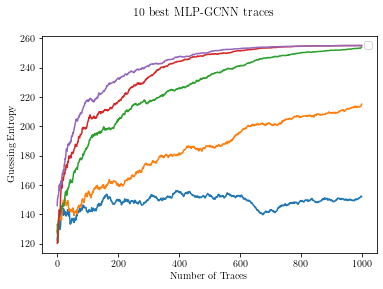

In [15]:
gcnn= data['experiments\\hyper_param_tuning_gcnn_mlp']
gcnn_data_flt = gcnn['res']
gcnn_data = utils.reshape_results(gcnn_data_flt,len(F),len(L),len(K),efn=1)
gcnn_mean = np.nanmean(gcnn_data_flt, axis=1)
gcnn_data_mean = np.nanmean(gcnn_data,axis=3)
gcnn_best_ids = np.argsort(gcnn_mean)[0:10]
gcnn_ids_unraveled = np.unravel_index(gcnn_best_ids, (len(F),len(L),len(K)))
plot_traces(gcnn_data_flt[gcnn_best_ids], '10 best MLP-GCNN traces')
gcnn_best_hp_list = np.array(gcnn['hyperparam'])[gcnn_best_ids.astype(int)].tolist()
utils.save_hyperparamlist(gcnn_best_hp_list, 'CE_hypertuning_GCNN')

C:\Users\vascodebruijn\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: Mean of empty slice
  """


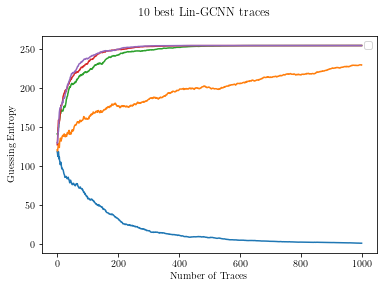

In [2]:
gcnn= data['experiments\\hyper_param_tuning_gcnn_lin']
gcnn_data_flt = gcnn['res']
gcnn_data = utils.reshape_results(gcnn_data_flt,len(F),len(L),len(K),efn=1)
gcnn_mean = np.nanmean(gcnn_data_flt, axis=1)
gcnn_data_mean = np.nanmean(gcnn_data,axis=3)
gcnn_best_ids = np.argsort(gcnn_mean)[0:10]
gcnn_ids_unraveled = np.unravel_index(gcnn_best_ids, (len(F),len(L),len(K)))
plot_traces(gcnn_data_flt[gcnn_best_ids], '10 best Lin-GCNN traces')
gcnn_best_hp_list = np.array(gcnn['hyperparam'])[gcnn_best_ids.astype(int)].tolist()




C:\Users\vascodebruijn\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: Mean of empty slice
  """


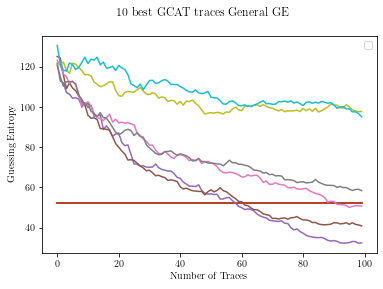

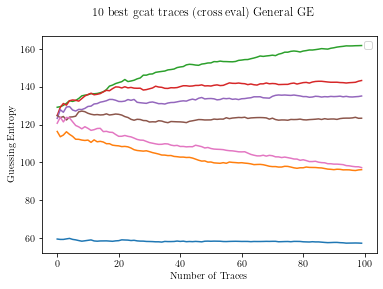

In [7]:
gcat= data['experiments\\hyper_param_tuning_gcat_GE_gen']
gcat_data_flt = gcat['res']
gcat_data = utils.reshape_results(gcat_data_flt,len(F),len(L),len(K),efn=1)
gcat_mean = np.nanmean(gcat_data_flt, axis=1)
gcat_data_mean = np.nanmean(gcat_data,axis=3)
gcat_best_ids = np.argsort(gcat_mean)[0:10]
gcat_ids_unraveled = np.unravel_index(gcat_best_ids, (len(F),len(L),len(K)))
plot_traces(gcat_data_flt[gcat_best_ids], '10 best GCAT traces General GE')
gcat_best_hp_list = np.array(gcat['hyperparam'])[gcat_best_ids.astype(int)].tolist()

gcat_CE = data['experiments\\CE_hypertuning_GCAT_GE_gen']
gcat_CE_data = gcat_CE['res']
gcat_CE_hyperparam = gcat_CE['hyperparam']
gcat_CE_data = gcat_CE_data[0:70,:]
gcat_CE_srt = np.reshape(gcat_CE_data,(7,10,100))
gcat_CE_mean = np.mean(gcat_CE_srt, axis = 1 )
plot_traces(gcat_CE_mean, '10 best gcat traces (cross eval) General GE')

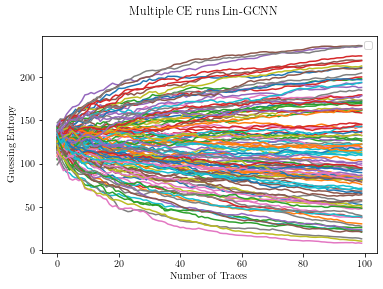

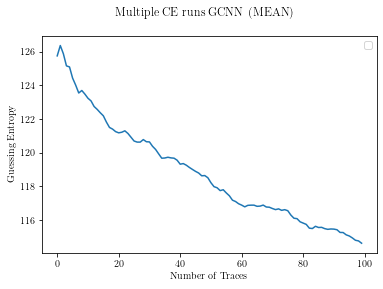

In [14]:
perf_gcnn = data['experiments\\perf_experiment_gcnn_lin']
perf_gcnn_data = perf_gcnn['res']
plot_traces(perf_gcnn_data,'Multiple CE runs Lin-GCNN ')
plot_traces(np.mean(perf_gcnn_data,axis=0),'Multiple CE runs GCNN (MEAN)')
